# Time series forecasing in Tensorflow

Thao tác trên file EURUSD.csv để tạo ra file mới là EURUSD_new.csv


In [97]:
import pandas as pd
df = pd.read_csv("D:/Github/Forex-prediction-EURUSD/data/EURUSD.csv")

df.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-01,1.259002,1.260796,1.247396,1.258194,1.258194,0.0
1,2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0.0
2,2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0.0
3,2004-01-06,1.268907,1.280803,1.267202,1.272103,1.272103,0.0
4,2004-01-07,1.272394,1.273999,1.262499,1.264095,1.264095,0.0


# Các thao tác phân tích, xử lý và trực quan dữ liệu 

In [98]:
# Đổi cột Date sang Index
df.Date = pd.to_datetime(df.Date, dayfirst = False) 
df.set_index("Date", inplace = True)

df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-01,1.259002,1.260796,1.247396,1.258194,1.258194,0.0
2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0.0
2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0.0
2004-01-06,1.268907,1.280803,1.267202,1.272103,1.272103,0.0
2004-01-07,1.272394,1.273999,1.262499,1.264095,1.264095,0.0


In [99]:
eurusd_prices = pd.DataFrame(df["Open"]).rename(columns={"Open": "Price"})

eurusd_prices.head(5)

,Price
Date,
2004-01-01,1.259002
2004-01-02,1.258194
2004-01-05,1.263903
2004-01-06,1.268907
2004-01-07,1.272394


In [100]:
from datetime import date
d0 = date(2022, 10, 14)
d1 = date(2004, 1, 1)
delta = abs(d0 - d1)

print("Số ngày từ 1/1/2004 -> 14/10/2022     : " + str(delta.days + 1) + " ngày")

print("")

print("Dữ liệu có trong dữ liệu hiện tại gồm : " + str(len(df)) + " ngày (Đã bao gồm giá trị Null)")

print("")

print("Dữ liệu thiếu                         : " + str(delta.days + 1- len(df)) + " ngày")

Số ngày từ 1/1/2004 -> 14/10/2022     : 6862 ngày

Dữ liệu có trong dữ liệu hiện tại gồm : 4903 ngày (Đã bao gồm giá trị Null)

Dữ liệu thiếu                         : 1959 ngày


In [101]:
time_sdata = pd.date_range("01/01/2004", periods=6862, freq="D") # 6862 là số ngày tính từ 1/1/2004 -> 14/10/2022 
data = pd.DataFrame(index=time_sdata)
data["Date"] = time_sdata 
data.set_index("Date", inplace = True)

In [102]:
import numpy as np 
# Khởi tạo các cột mới trong data 
data["Open"] = [np.NaN]*len(data)
data["High"] = [np.NaN]*len(data)
data["Low"] = [np.NaN]*len(data)
data["Close"] = [np.NaN]*len(data)
data["Adj Close"] = [np.NaN]*len(data)
data["Volume"] = [np.NaN]*len(data)

In [103]:
# Chuyển dữ liệu từ df sang data (Các dữ liệu k có ở df thì tương ứng ở data sẽ là NaN)
for i in range(len(df)):
    for j in range(i, len(data)):
        if df.index[i] == data.index[j]:
            data[:][j:j+1] = df[:][i:i+1]
            break 
        
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-01,1.259002,1.260796,1.247396,1.258194,1.258194,0.0
2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0.0
2004-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0.0
...,...,...,...,...,...,...
2022-10-10,0.973501,0.975229,0.968251,0.973501,0.973501,0.0
2022-10-11,0.971006,0.975810,0.967399,0.971006,0.971006,0.0
2022-10-12,0.970017,0.973302,0.966968,0.970017,0.970017,0.0


In [104]:
# Lưu lại dữ liệu mới  
#data.to_csv("D:/Github/Forex-prediction-EURUSD/data/EURUSD_new.csv")

Thao tác trên file EURUSD_new.csv, Dữ liệu thao tác lưu vào biến data

In [105]:
data.isnull().sum()

Open         1989
High         1989
Low          1989
Close        1989
Adj Close    1989
Volume       1989
dtype: int64

In [106]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4873.000000,4873.000000,4873.000000,4873.000000,4873.000000,4873.0
mean,1.247380,1.252041,1.242237,1.247390,1.247390,0.0
std,0.123629,0.124361,0.124143,0.123625,0.123625,0.0
min,0.959619,0.967006,0.072902,0.959619,0.959619,0.0
25%,1.137139,1.140901,1.133800,1.137139,1.137139,0.0
50%,1.236598,1.240325,1.230300,1.236308,1.236308,0.0
75%,1.336095,1.340986,1.331079,1.336112,1.336112,0.0
max,1.598184,1.602821,1.587402,1.598798,1.598798,0.0


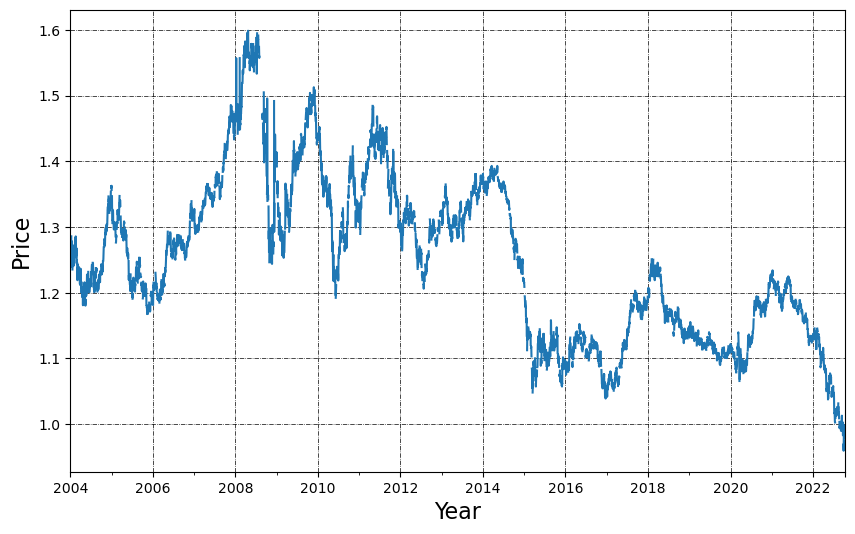

In [107]:
# Trực quan cột Close trong data 
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

data['Close'].plot(figsize=(10, 6))

plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

In [108]:
# Điền khuyết 
data = data.interpolate()

data['Open'].plt(figsize=(20, 6))

plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

AttributeError: 'Series' object has no attribute 'plt'

In [ ]:
timesteps = data.index.to_numpy()
prices = data["Open"].to_numpy()

timesteps[:10], prices[:10]

(array(['2004-01-01T00:00:00.000000000', '2004-01-02T00:00:00.000000000',
        '2004-01-03T00:00:00.000000000', '2004-01-04T00:00:00.000000000',
        '2004-01-05T00:00:00.000000000', '2004-01-06T00:00:00.000000000',
        '2004-01-07T00:00:00.000000000', '2004-01-08T00:00:00.000000000',
        '2004-01-09T00:00:00.000000000', '2004-01-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([1.259002  , 1.258194  , 1.260097  , 1.262     , 1.263903  ,
        1.268907  , 1.272394  , 1.264095  , 1.277498  , 1.27993267]))

In [ ]:
# Khởi tạo tập Train-Test 
split_size = int(0.8 * len(prices)) # 80% train, 20% test

X_train, y_train = timesteps[:split_size], prices[:split_size]


X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(5489, 1373, 5489, 1373)

In [ ]:
# Tạo hàm vẽ dữ liệu time series
from numpy import size


def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):

  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("EUR/USD")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

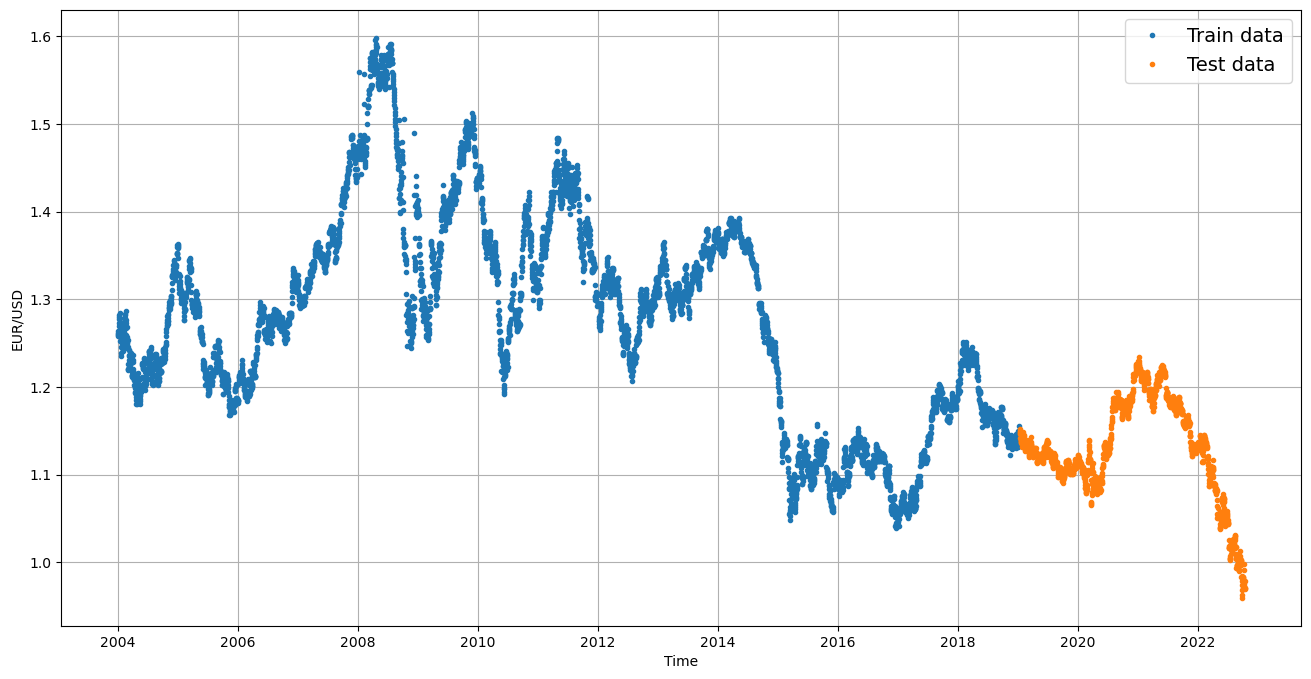

In [ ]:
plt.figure(figsize=(20, 6))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Modelling Experiments


| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA | 
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA | 
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA| 
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |


horizon: số bước dự đoán trong tương lai (ngày)

window size: số bước trong quá khứ dùng để dự đoán (ngày)

## Model 0:  Naïve model

In [ ]:
# Khởi tạo 
naive_forecast = y_test[:-1] # Khởi tạo không bao gồm giá trị cuối cùng 
naive_forecast[:10], naive_forecast[-10:] 

(array([1.151517  , 1.14977   , 1.148023  , 1.146276  , 1.147315  ,
        1.141409  , 1.1399    , 1.139186  , 1.13830533, 1.13742467]),
 array([0.983207  , 0.998432  , 0.9911    , 0.978905  , 0.97710367,
        0.97530233, 0.973501  , 0.971006  , 0.970017  , 0.970798  ]))

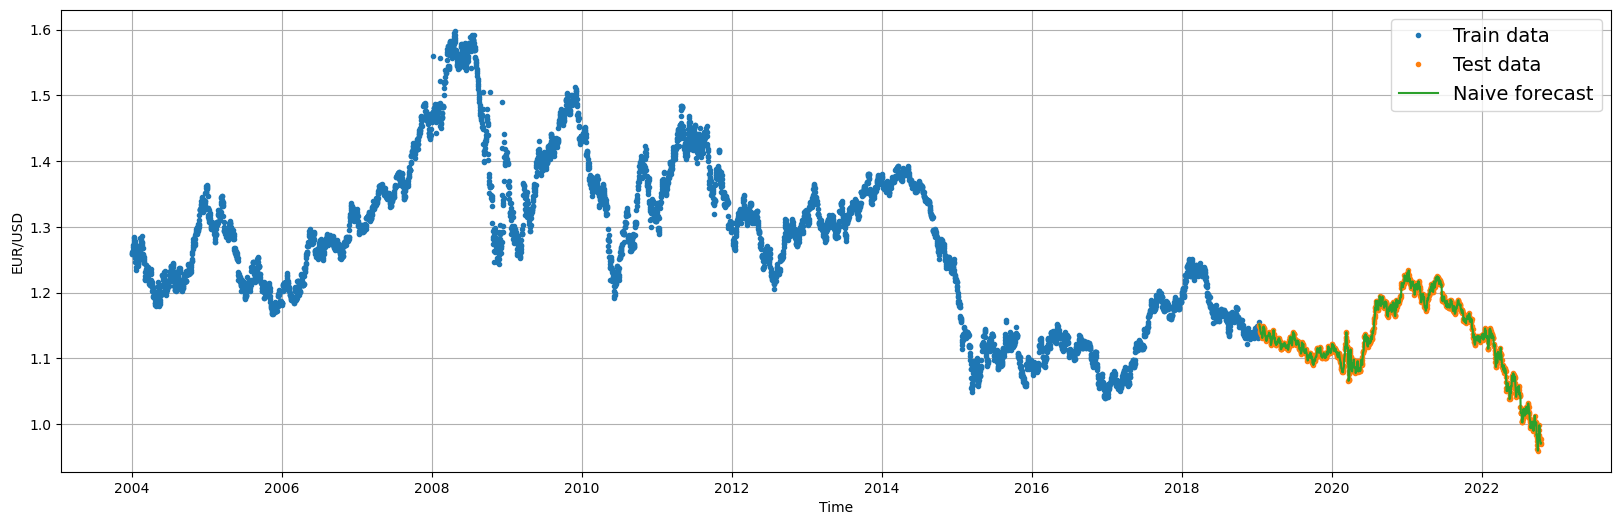

In [ ]:
plt.figure(figsize=(20, 6))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

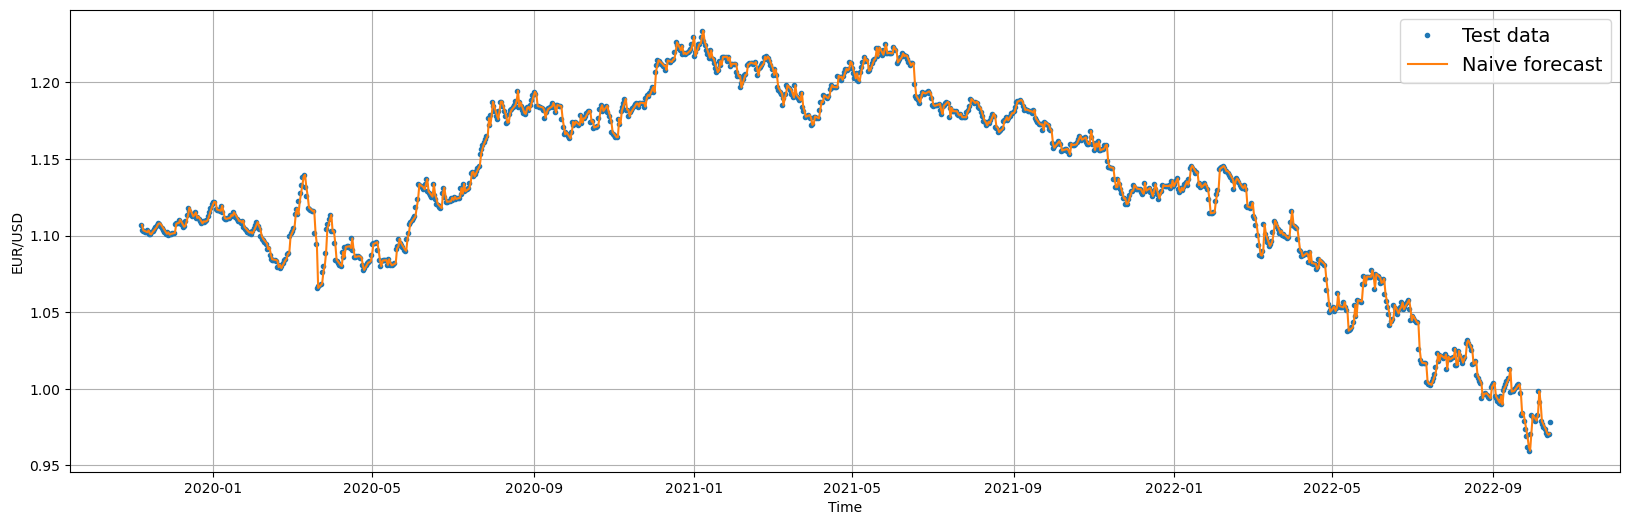

In [ ]:
plt.figure(figsize=(20, 6))
offset = 300
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [ ]:
import tensorflow as tf

In [ ]:
# Hàm tính MASE 
def mean_absolute_scaled_error(y_true, y_pred):
  
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) 

  return mae / mae_naive_no_season

In [ ]:
# Hàm đánh giá hiệu quả dự đoán của mô hình 
def evaluate_preds(y_true, y_pred):

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 0.002583291,
 'mse': 1.433463e-05,
 'rmse': 0.00378611,
 'mape': 0.23079406,
 'mase': 0.99976385}

In [ ]:
tf.reduce_mean(y_test).numpy()

1.1299836434814274

## Khởi tạo dữ liệu: horizon = 1, window  = 7 
Ví dụ: 

[1,2,3,4,5,6,7] -> 8

[2,3,4,5,6,7,8] -> 9 

[3,4,5,6,7,8,9] -> 10 

In [ ]:
# Sử dụng dữ liệu 7 ngày liên tiếp để dự đoán 1 ngày tiếp theo 
HORIZON = 1 
WINDOW_SIZE = 7 

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Ví dụ: 
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test hàm get_labelled_windows()
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
def make_windows(x, window_size=7, horizon=1):
  
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

    windowed_array = x[window_indexes]

    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

# Nguồn tham khảo: (https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5)

In [ ]:
# Kiểm tra 3 cái đầu tiên 
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [1.259002 1.258194 1.260097 1.262    1.263903 1.268907 1.272394] -> Label: [1.264095]
Window: [1.258194 1.260097 1.262    1.263903 1.268907 1.272394 1.264095] -> Label: [1.277498]
Window: [1.260097 1.262    1.263903 1.268907 1.272394 1.264095 1.277498] -> Label: [1.27993267]


In [ ]:
# Chia tập train-test tỉ lệ 80-20

def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(5484, 1371, 5484, 1371)

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Modelling checkpoint 

Sử dụng:  [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint). 

=> Theo dõi hiệu suất tốt nhất của model và lưu lại, khi đánh giá sẽ sử dụng cấu hình tốt nhất của model.

In [ ]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), 
                                            verbose=0, 
                                            save_best_only=True) # Chỉ lưu model tốt nhất vào tệp 

## Model 1: Dense model (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")], name="model_1_dense") 


model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 


model_1.fit(x=train_windows, 
            y=train_labels, 
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) 

Epoch 1/100
43/43 [==============================] - 4s 25ms/step - loss: 0.1366 - mae: 0.1366 - val_loss: 0.0255 - val_mae: 0.0255
Epoch 2/100
43/43 [==============================] - 1s 19ms/step - loss: 0.0106 - mae: 0.0106 - val_loss: 0.0076 - val_mae: 0.0076
Epoch 3/100
43/43 [==============================] - 1s 25ms/step - loss: 0.0093 - mae: 0.0093 - val_loss: 0.0088 - val_mae: 0.0088
Epoch 4/100
43/43 [==============================] - 2s 52ms/step - loss: 0.0089 - mae: 0.0089 - val_loss: 0.0069 - val_mae: 0.0069
Epoch 5/100
43/43 [==============================] - 1s 33ms/step - loss: 0.0092 - mae: 0.0092 - val_loss: 0.0053 - val_mae: 0.0053
Epoch 6/100
43/43 [==============================] - 1s 21ms/step - loss: 0.0087 - mae: 0.0087 - val_loss: 0.0053 - val_mae: 0.0053
Epoch 7/100
43/43 [==============================] - 1s 19ms/step - loss: 0.0089 - mae: 0.0089 - val_loss: 0.0052 - val_mae: 0.0052
Epoch 8/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 1ms/step - loss: 0.0034 - mae: 0.0034


[0.0034057111479341984, 0.0034057111479341984]

In [ ]:
# Tạo hàm để model dự đoán 
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast) 

In [ ]:
# Đánh giá cuối cùng 
def model_results(model):
    model_preds = make_preds(model, input_data=test_windows)

    model_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_preds)
    print(model_results)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

43/43 [==============================] - 2s 1ms/step


(1371,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1.1505203, 1.1490889, 1.1479268, 1.1469069, 1.1452134, 1.1425176,
        1.1409802, 1.1396742, 1.1386346, 1.1382003], dtype=float32)>)

In [ ]:
model_results(model_1)

43/43 [==============================] - 0s 1ms/step
{'mae': 0.0034057114, 'mse': 2.212644e-05, 'rmse': 0.004703875, 'mape': 0.30496076, 'mase': 1.3177387}


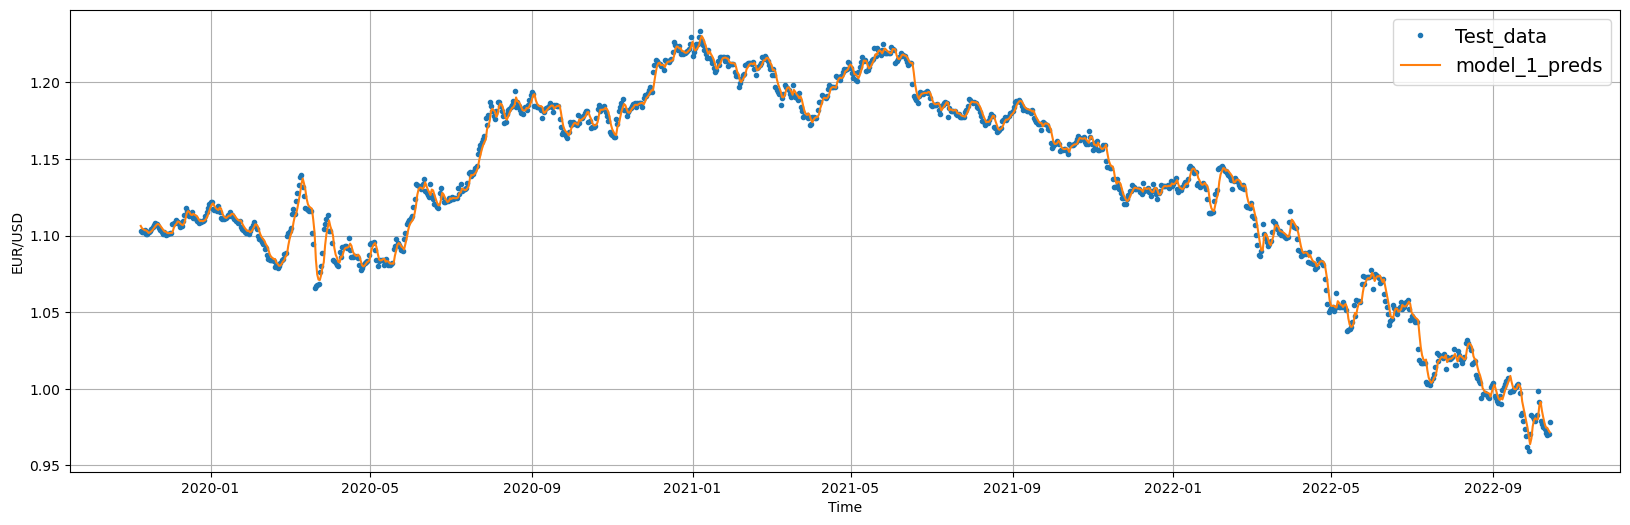

In [ ]:
offset = 300
plt.figure(figsize=(20,6))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [ ]:
HORIZON = 1 
WINDOW_SIZE = 30 

In [ ]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) 
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Đánh giá model 2 
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 1ms/step - loss: 0.0034


0.0034057111479341984

In [ ]:
model_results(model_2)

43/43 [==============================] - 0s 1ms/step
{'mae': 0.0034057114, 'mse': 2.212644e-05, 'rmse': 0.004703875, 'mape': 0.30496076, 'mase': 1.3177387}


In [ ]:
model_2_preds = make_preds(model_2, input_data=test_windows)

model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_2_preds)
model_2_results

43/43 [==============================] - 0s 1ms/step


{'mae': 0.0034057114,
 'mse': 2.212644e-05,
 'rmse': 0.004703875,
 'mape': 0.30496076,
 'mase': 1.3177387}